#### Correlation between the 2021 Super Bowl and a possible rise in cases of COVID-19

In [14]:
#Importing libraries
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import numpy as np
import sdt.changepoint as c
import math

In [15]:
# create a dataframe from the csv file
file_path = "./covid_confirmed_usafacts.csv"
# Read the CSV file using pandas
dataframe = pd.read_csv(file_path)
#get rid of all the rows with county name = Statewide Unallocated
dataframe = dataframe[dataframe['County Name'] != 'Statewide Unallocated']
#get rid of all the rows with county name = Out of Country
dataframe = dataframe[dataframe['County Name'] != 'Out of Country']

In [16]:
#CREATION OF THE DATAFRAME

#restrict the date range to 2021-01-23 to 2021-02-23 but keep state, countyFIPS and StateFIPS
#aggregate by state
grouped = dataframe.groupby('State').sum()
#rename the grouped column as State
grouped = grouped.rename_axis('Date').reset_index()
partGrouped = grouped[["Date"]]
start_date = date(2021, 1, 24) 
super_bowl_date = date(2021, 2, 7)
sbplus7_date = date(2021, 2, 14)
sbplus14_date = date(2021, 2, 21)

difference = super_bowl_date - start_date

end_date = date(2021, 3, 7)
final_diff = end_date - start_date
delta = end_date - start_date   # returns timedelta
listdays = []
for i in range(delta.days + 1):
    day = start_date + timedelta(days=i)
    listdays.append(day.strftime("%Y-%m-%d"))

otherGrouped = grouped[listdays]
#join the two dataframes
grouped = pd.concat([partGrouped, otherGrouped], axis=1)
grouped = grouped.T
grouped.columns = grouped.iloc[0]
grouped = grouped.iloc[1: , :]
#grouped.rename(columns = {'State':'Date'}, inplace = True )
grouped.head()

dataframe_list = []

for col in grouped.columns:
    dataframe_list.append(grouped[[col]])

for d in dataframe_list:
    #add column with difference between current day and previous day
    d['Diff'] = d.diff()
    #add column with moving average of the difference
    d['MAV'] = d['Diff'].rolling(window=7).mean()
    
    #add column with the log of the moving average
    d['Log'] = np.log(d['MAV'])
    d.dropna(inplace=True)
    d.index = pd.to_datetime(d.index)

#CREATION OF THE DATAFRAME

C:\Users\Simone\AppData\Local\Temp\ipykernel_2356\4281568608.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Diff'] = d.diff()
C:\Users\Simone\AppData\Local\Temp\ipykernel_2356\4281568608.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['MAV'] = d['Diff'].rolling(window=7).mean()
C:\Users\Simone\AppData\Local\Temp\ipykernel_2356\4281568608.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [17]:
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

[32]
 
-0.01301 x + 149.2   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]   range(0, 33)   #116530
 
-5.2 x + 295.2   [32 33 34 35]   range(32, 36)   #DB3F29


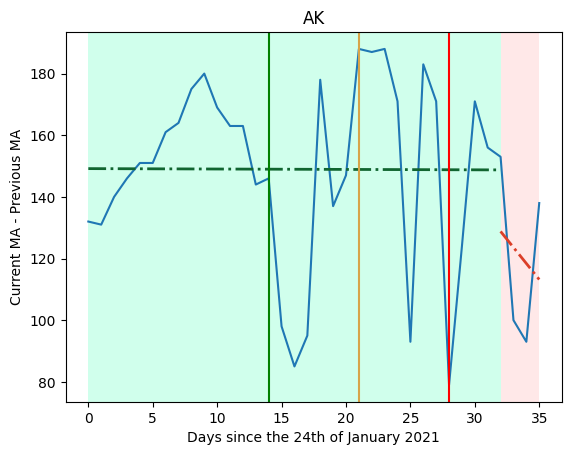

[13]
 
-107.9 x + 2637   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
-8.367 x + 1178   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(13, 36)   #DB3F29


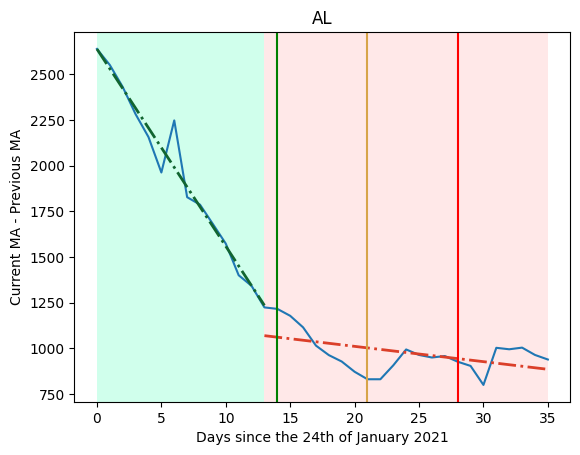

[13]
 
-42.1 x + 1777   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
-0.8923 x + 655.9   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(13, 36)   #DB3F29


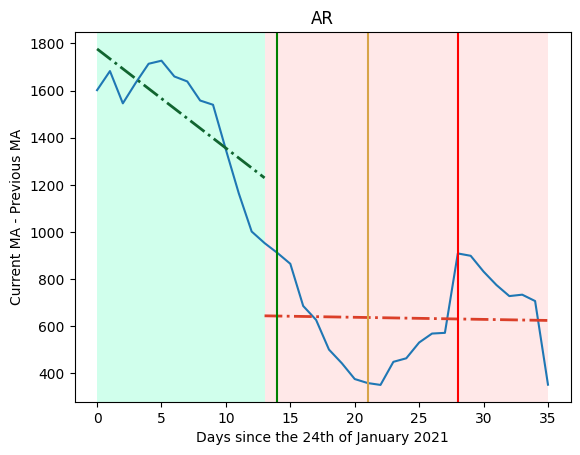

[15]
 
-198 x + 4911   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
-12.59 x + 1773   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(15, 36)   #DB3F29


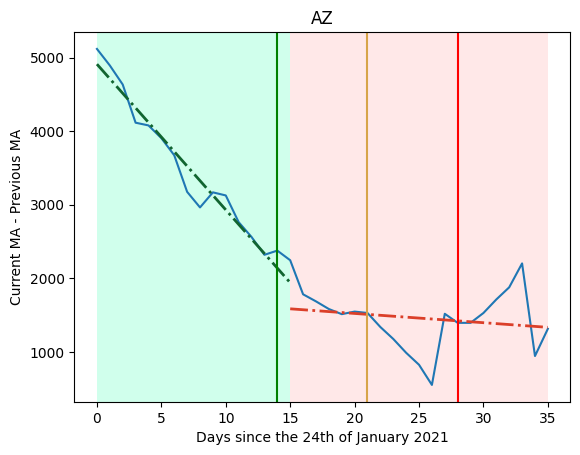

[17]
 
-554.8 x + 1.437e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
-138 x + 7470   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(17, 36)   #DB3F29


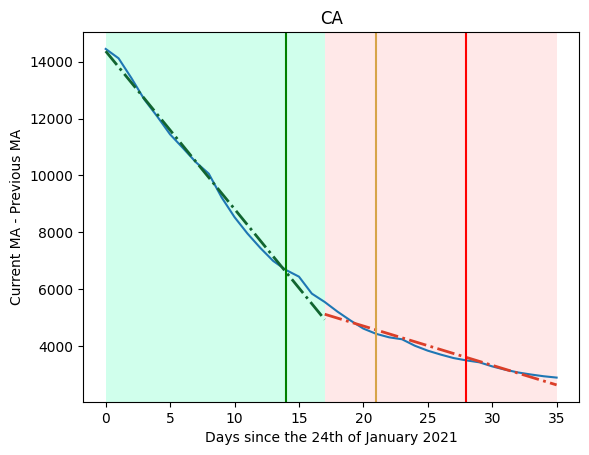

[14]
 
-1.829 x + 1322   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
4.523 x + 998.6   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(14, 36)   #DB3F29


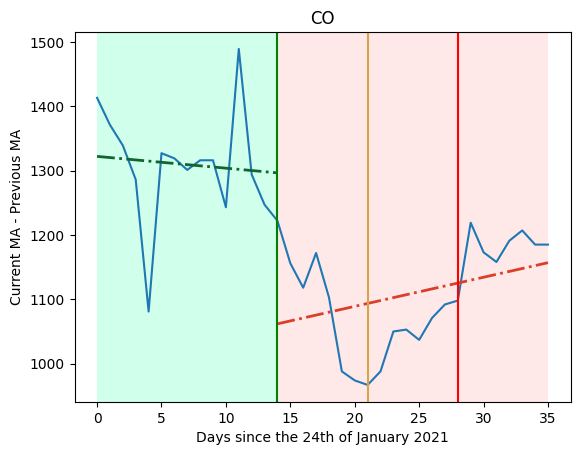

[15]
 
-36.6 x + 1583   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
-1.358 x + 897   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(15, 36)   #DB3F29


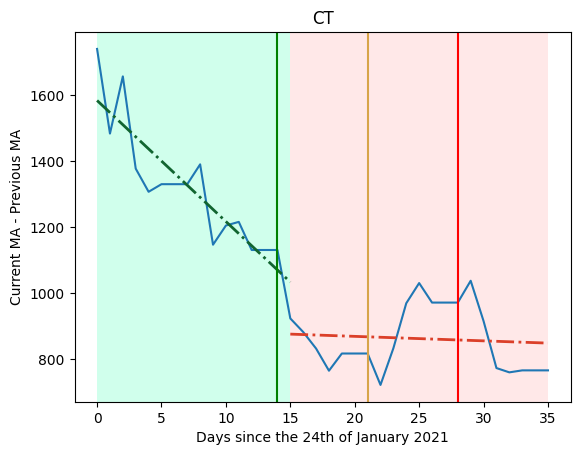

[12]
 
-5.448 x + 211.3   [ 0  1  2  3  4  5  6  7  8  9 10 11 12]   range(0, 13)   #116530
 
0.5978 x + 106.1   [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(12, 36)   #DB3F29


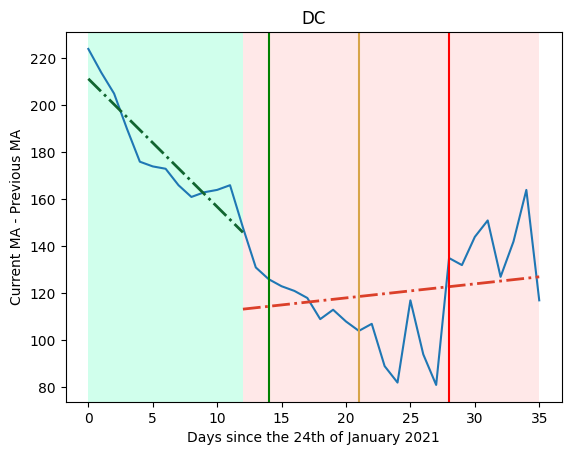

[17]
 
-8.233 x + 449.7   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
5.411 x + 125.3   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(17, 36)   #DB3F29


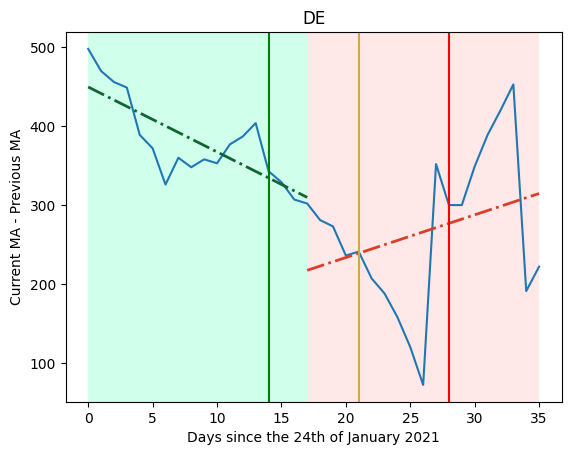

[14]
 
-253.6 x + 1.024e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
-71.52 x + 7666   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(14, 36)   #DB3F29


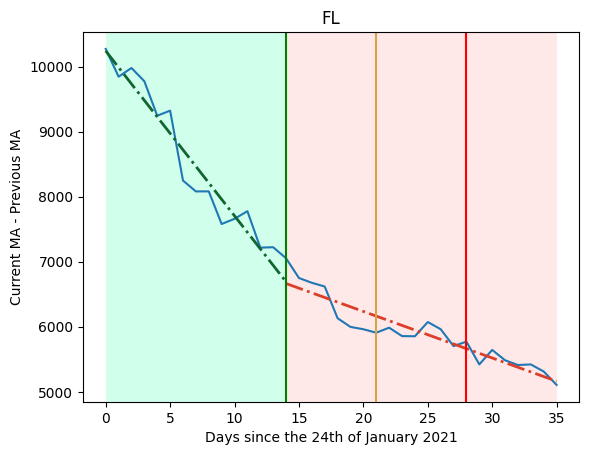

[14]
 
-131 x + 4326   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
-37.06 x + 2877   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(14, 36)   #DB3F29


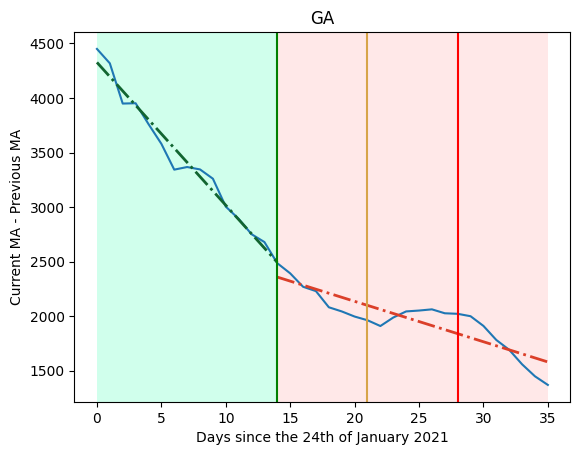

[13]
 
-2.621 x + 95.03   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
-0.1858 x + 50.28   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(13, 36)   #DB3F29


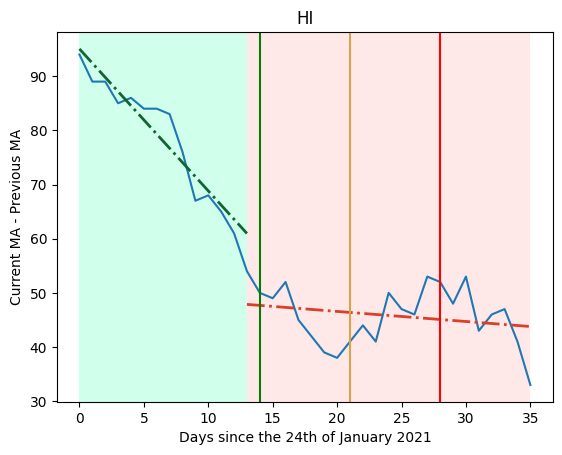

[17]
 
-18.6 x + 909.2   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
-7.872 x + 717.6   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(17, 36)   #DB3F29


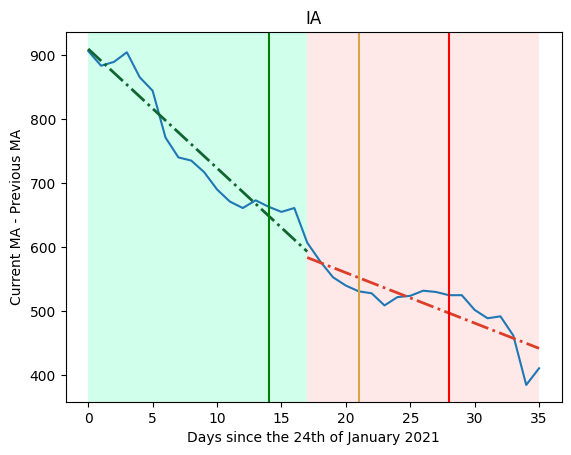

[14]
 
-8.593 x + 432.9   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
0.7357 x + 251.8   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(14, 36)   #DB3F29


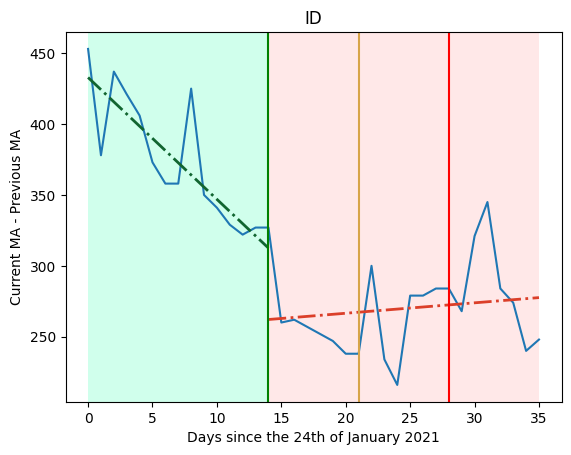

[15]
 
-81.45 x + 3431   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
-17.47 x + 2234   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(15, 36)   #DB3F29


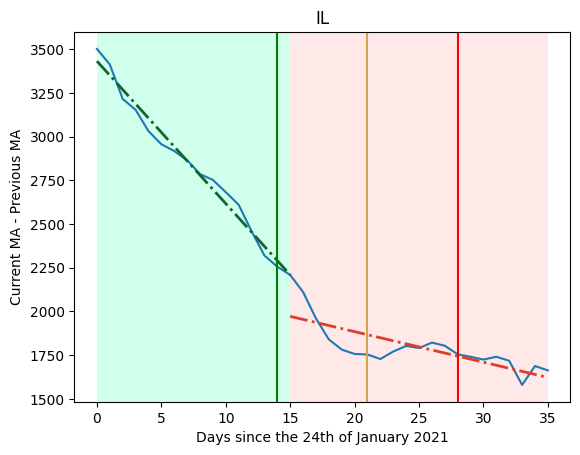

[17]
 
-60.74 x + 2234   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
-17.67 x + 1367   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(17, 36)   #DB3F29


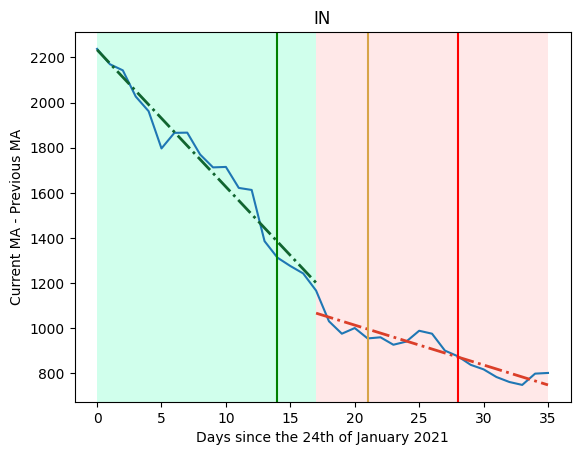

[26]
 
-21.32 x + 1044   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]   range(0, 27)   #116530
 
-11.38 x + 672.3   [26 27 28 29 30 31 32 33 34 35]   range(26, 36)   #DB3F29


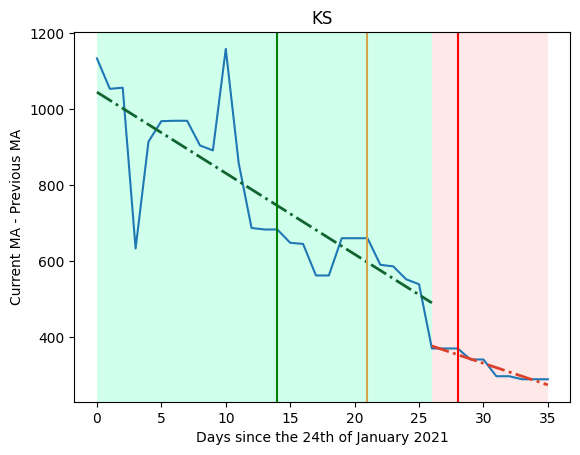

[16]
 
-64.12 x + 2517   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
-19.52 x + 1614   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(16, 36)   #DB3F29


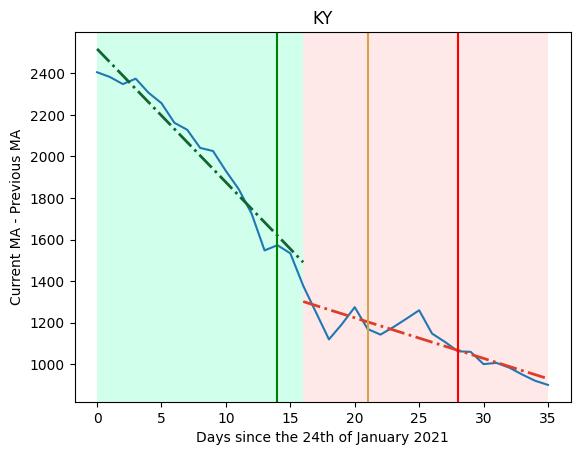

[15]
 
-92.35 x + 2326   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
-7.082 x + 921.8   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(15, 36)   #DB3F29


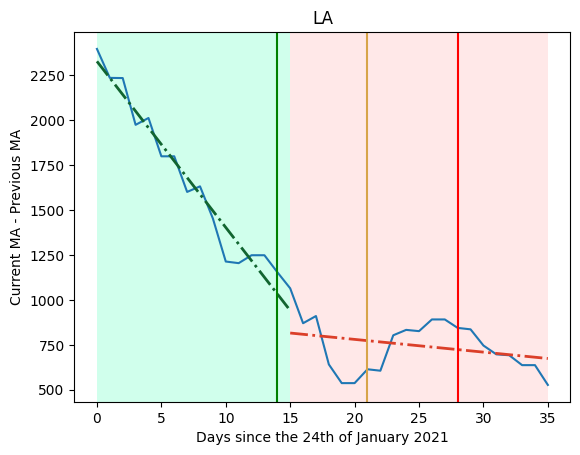

[14]
 
-67.9 x + 3021   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
-23.92 x + 2094   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(14, 36)   #DB3F29


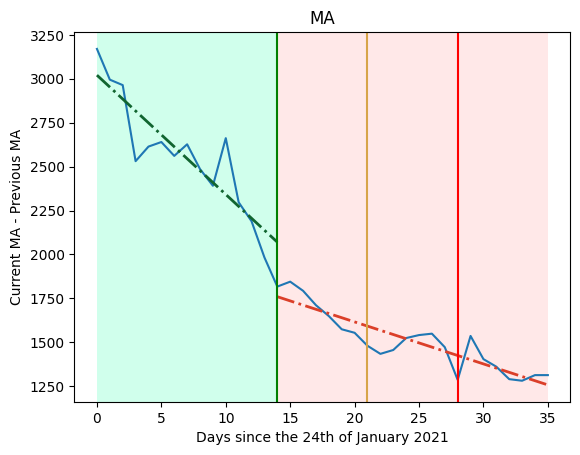

[15]
 
-50.11 x + 1749   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
-8.555 x + 1026   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(15, 36)   #DB3F29


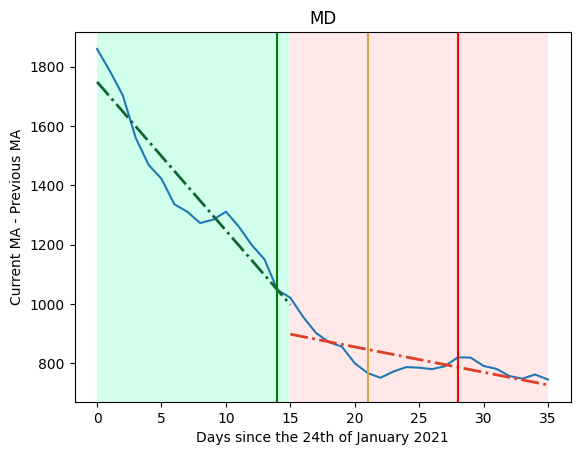

[9]
 
-16.57 x + 342.8   [0 1 2 3 4 5 6 7 8 9]   range(0, 10)   #116530
 
-1.061 x + 186.1   [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35]   range(9, 36)   #DB3F29


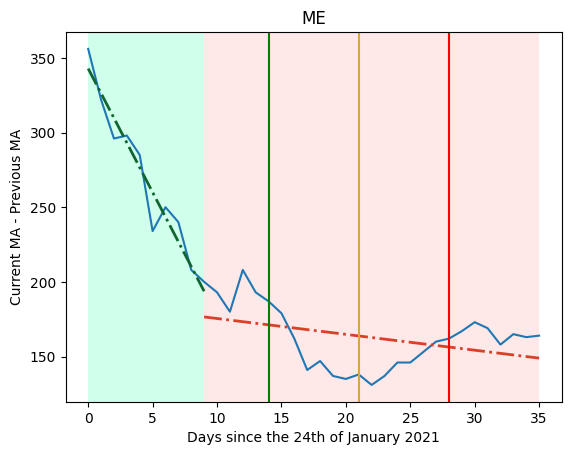

[8]
 
-59.55 x + 1849   [0 1 2 3 4 5 6 7 8]   range(0, 9)   #116530
 
7.816 x + 1054   [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35]   range(8, 36)   #DB3F29


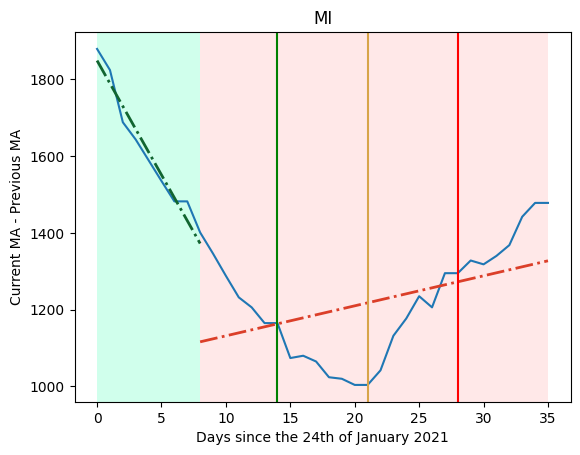

[8]
 
-10.94 x + 976.4   [0 1 2 3 4 5 6 7 8]   range(0, 9)   #116530
 
-2.16 x + 839.5   [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35]   range(8, 36)   #DB3F29


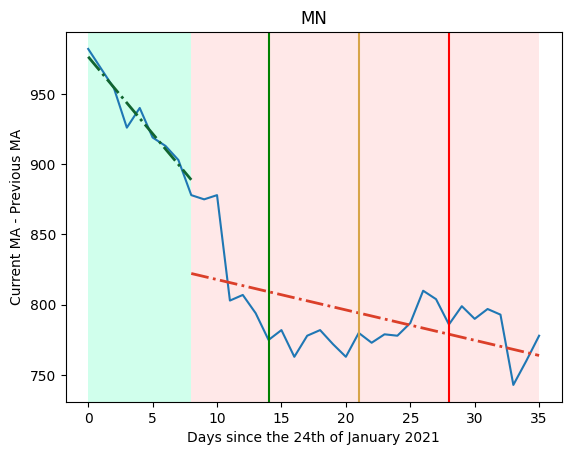

[15]
 
-61.26 x + 1726   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
-12.33 x + 956.9   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(15, 36)   #DB3F29


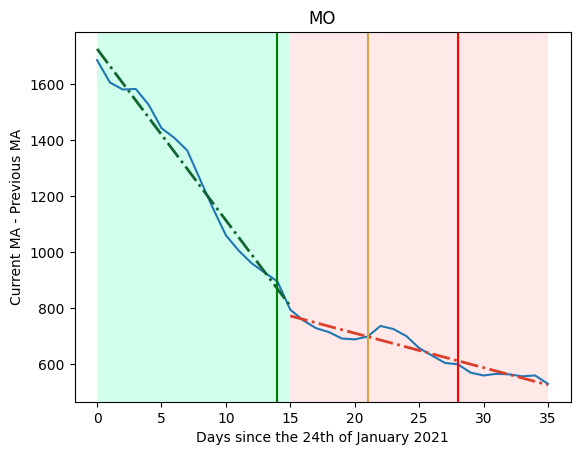

[18]
 
-41.38 x + 1369   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]   range(0, 19)   #116530
 
-4.165 x + 614.6   [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(18, 36)   #DB3F29


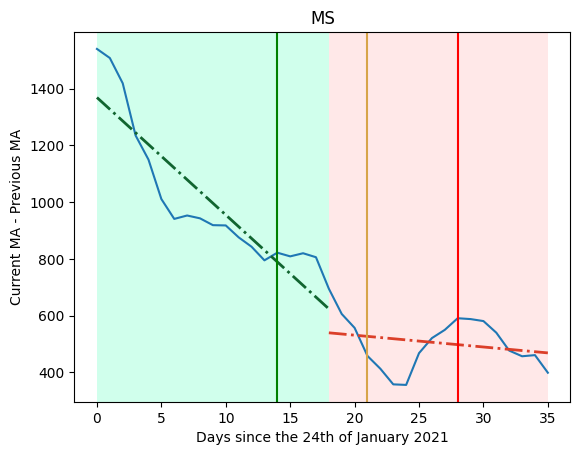

[16]
 
-7.829 x + 334.8   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
-2.826 x + 246.4   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(16, 36)   #DB3F29


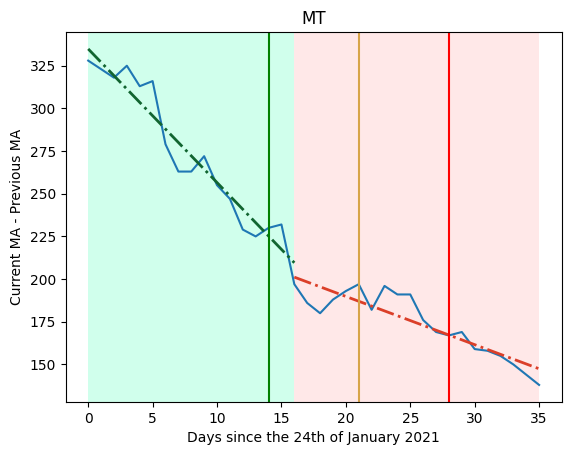

[15]
 
-154.8 x + 6155   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
-79.63 x + 4717   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(15, 36)   #DB3F29


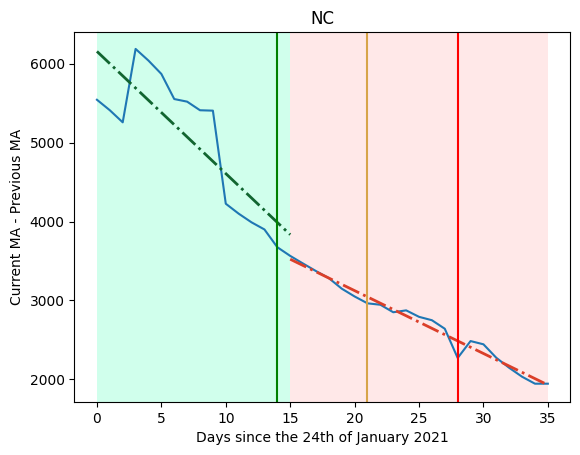

[16]
 
-5.684 x + 119.6   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
-1.001 x + 113   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(16, 36)   #DB3F29


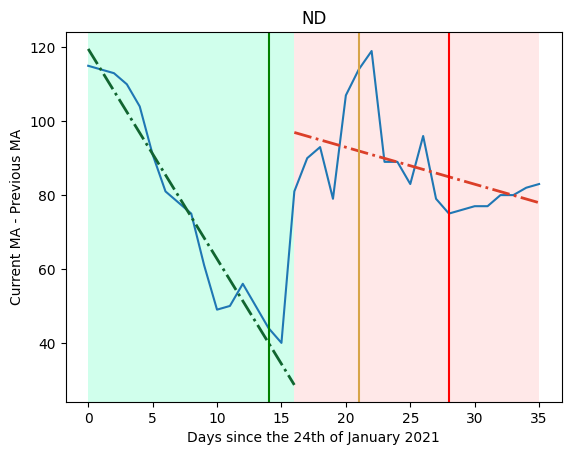

[19]
 
-3.812 x + 455.5   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]   range(0, 20)   #116530
 
-1.194 x + 313.9   [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(19, 36)   #DB3F29


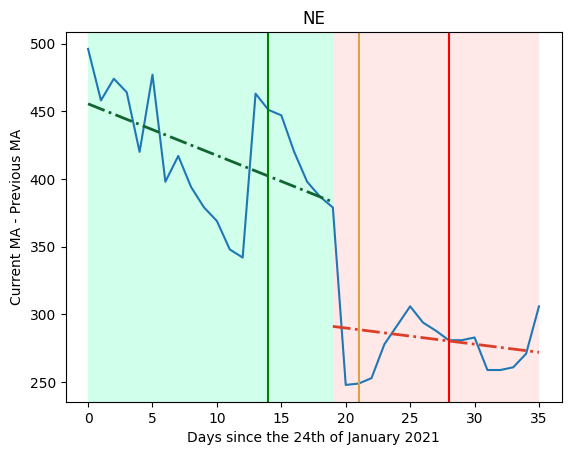

[28]
 
-4.389 x + 432.5   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]   range(0, 29)   #116530
 
-19.24 x + 852.5   [28 29 30 31 32 33 34 35]   range(28, 36)   #DB3F29


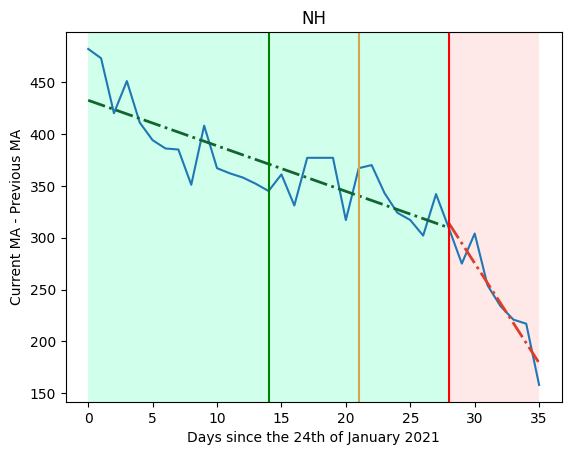

[5]
 
-234.7 x + 4947   [0 1 2 3 4 5]   range(0, 6)   #116530
 
-17.52 x + 3687   [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35]   range(5, 36)   #DB3F29


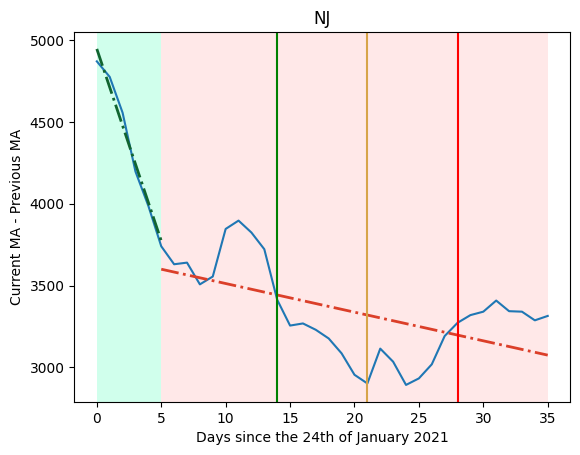

[16]
 
-21.09 x + 682.1   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
-6.156 x + 463   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(16, 36)   #DB3F29


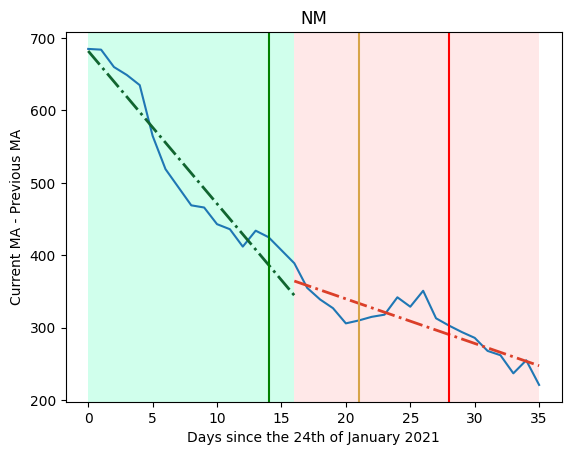

[17]
 
-32.01 x + 1051   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
-7.53 x + 587.2   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(17, 36)   #DB3F29


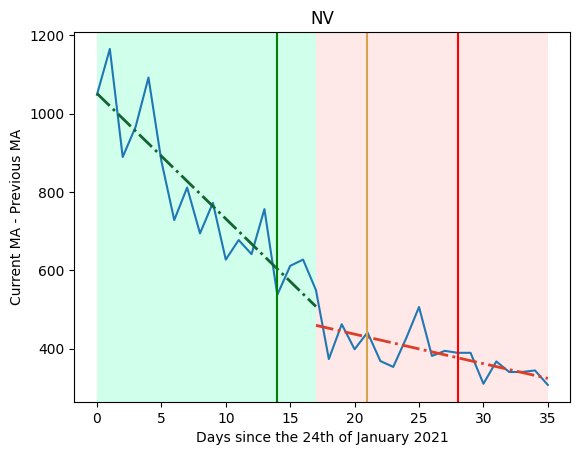

[14]
 
-179.4 x + 1.067e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
-18.8 x + 7861   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(14, 36)   #DB3F29


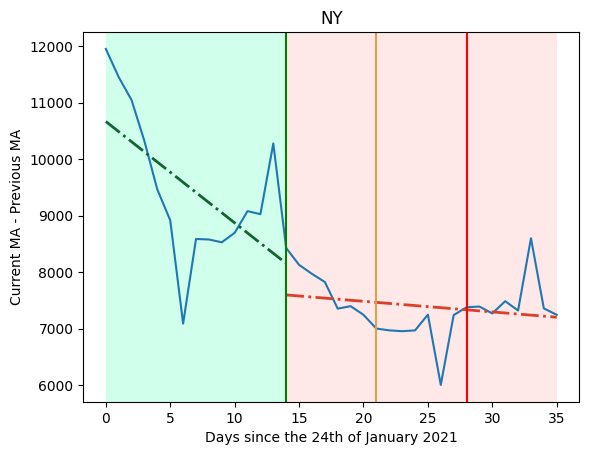

[16]
 
-125.1 x + 4411   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
-43.78 x + 3103   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(16, 36)   #DB3F29


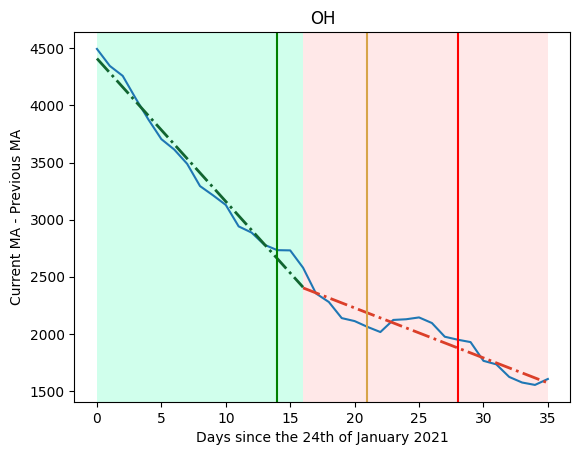

[18]
 
-71.58 x + 2480   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]   range(0, 19)   #116530
 
-17.7 x + 1234   [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(18, 36)   #DB3F29


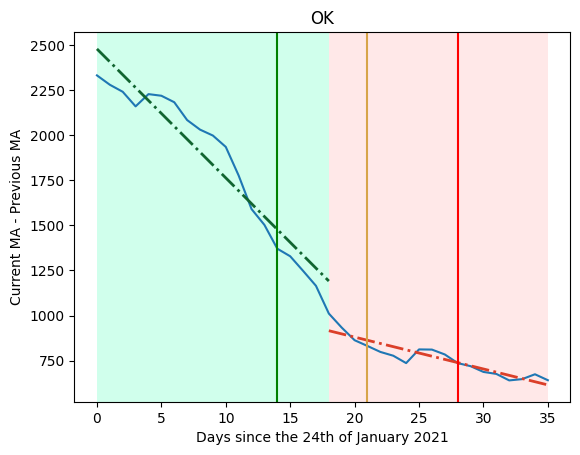

[14]
 
-15.73 x + 704.9   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
-5.7 x + 510.9   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(14, 36)   #DB3F29


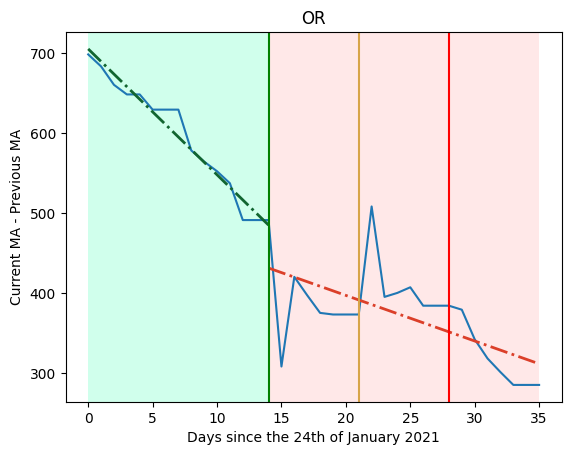

[16]
 
-129.3 x + 5198   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
-27.2 x + 3372   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(16, 36)   #DB3F29


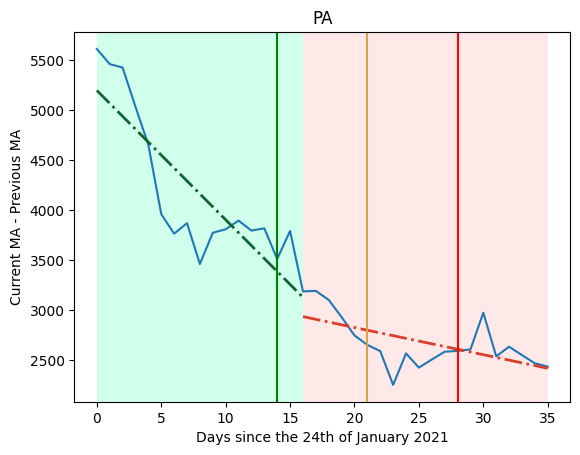

[10]
 
-13.62 x + 678.4   [ 0  1  2  3  4  5  6  7  8  9 10]   range(0, 11)   #116530
 
-5.765 x + 481.7   [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35]   range(10, 36)   #DB3F29


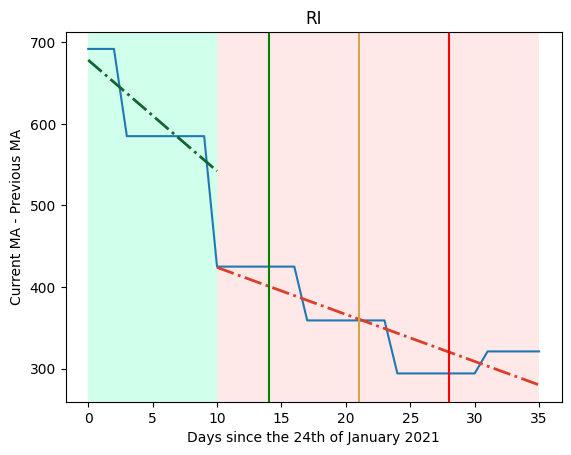

[26]
 
-51.66 x + 3608   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]   range(0, 27)   #116530
 
-94.68 x + 4537   [26 27 28 29 30 31 32 33 34 35]   range(26, 36)   #DB3F29


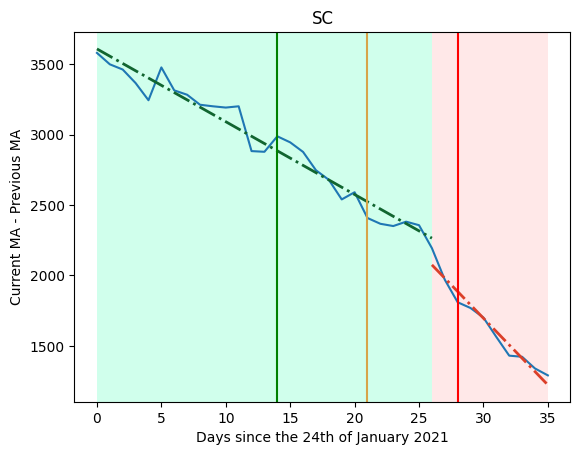

[6]
 
-12.69 x + 171.4   [0 1 2 3 4 5 6]   range(0, 7)   #116530
 
0.04983 x + 150.7   [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35]   range(6, 36)   #DB3F29


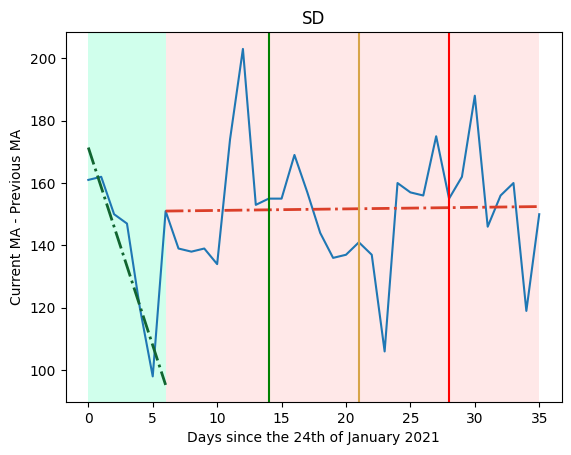

[17]
 
-46.62 x + 2623   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
-7.535 x + 1438   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(17, 36)   #DB3F29


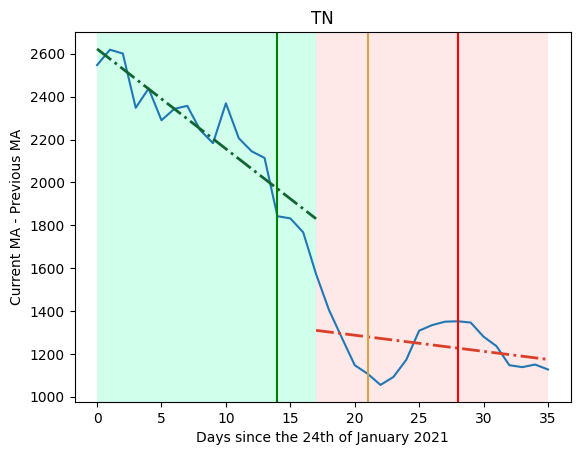

[16]
 
-770.7 x + 2.12e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
43.5 x + 5440   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(16, 36)   #DB3F29


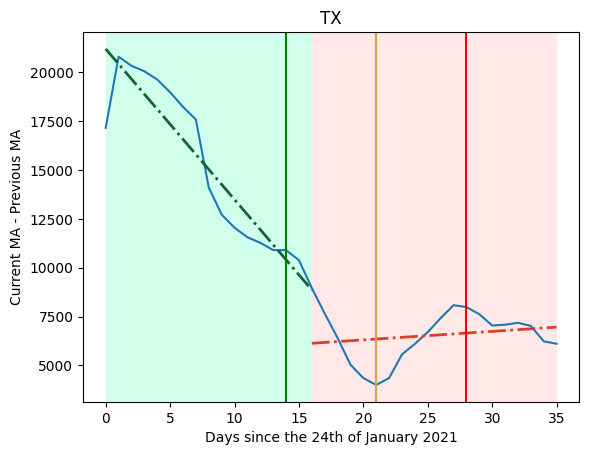

[17]
 
-31.35 x + 1388   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
-20.12 x + 1188   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(17, 36)   #DB3F29


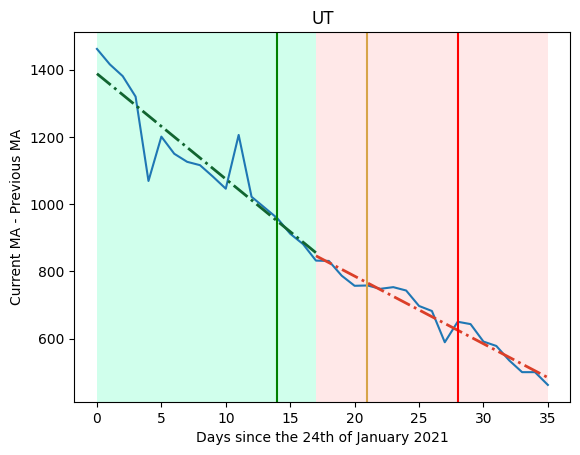

[19]
 
-81.3 x + 4068   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]   range(0, 20)   #116530
 
-50.67 x + 3142   [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(19, 36)   #DB3F29


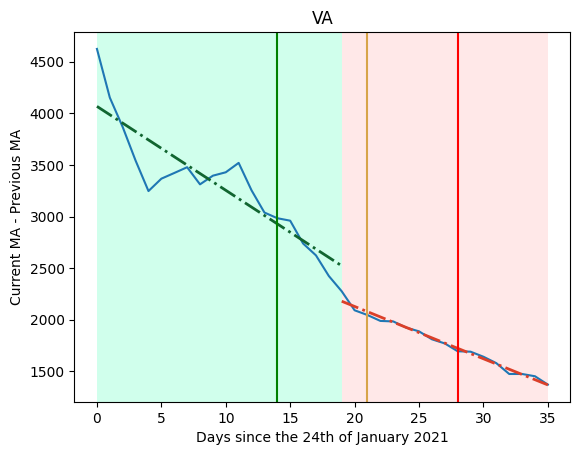

[10]
 
0.2061 x + 132.9   [ 0  1  2  3  4  5  6  7  8  9 10]   range(0, 11)   #116530
 
-0.1456 x + 115   [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35]   range(10, 36)   #DB3F29


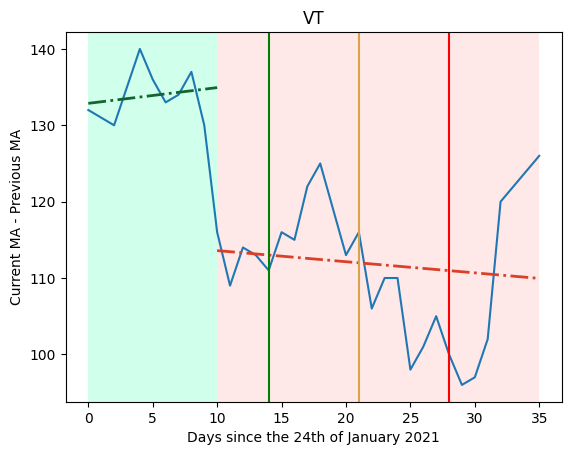

[14]
 
-41.24 x + 1628   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
-7.491 x + 1006   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(14, 36)   #DB3F29


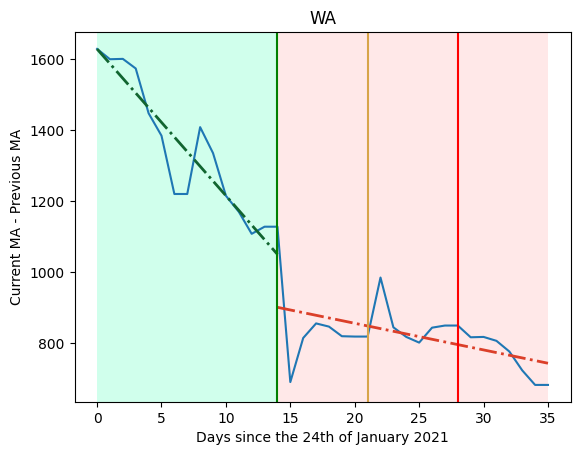

[14]
 
-49.74 x + 1554   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
-10.57 x + 991   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(14, 36)   #DB3F29


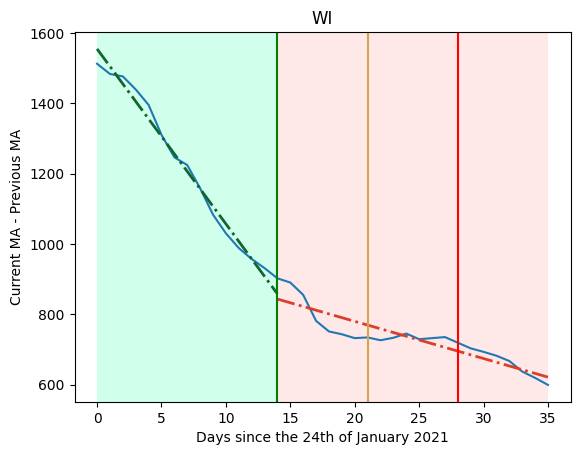

[16]
 
-30.37 x + 815.6   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
-4.12 x + 399.9   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]   range(16, 36)   #DB3F29


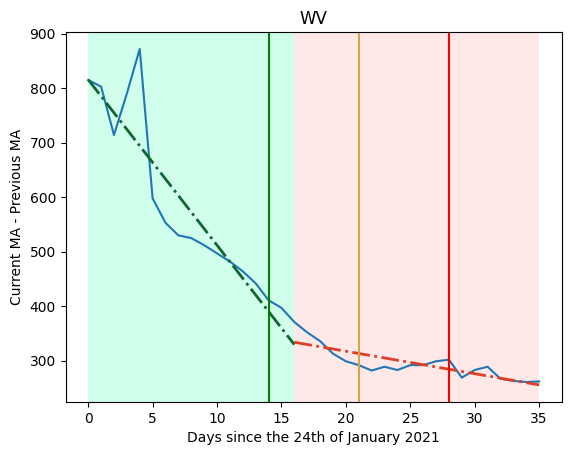

[10]
 
-5 x + 149.6   [ 0  1  2  3  4  5  6  7  8  9 10]   range(0, 11)   #116530
 
-0.2055 x + 83.12   [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35]   range(10, 36)   #DB3F29


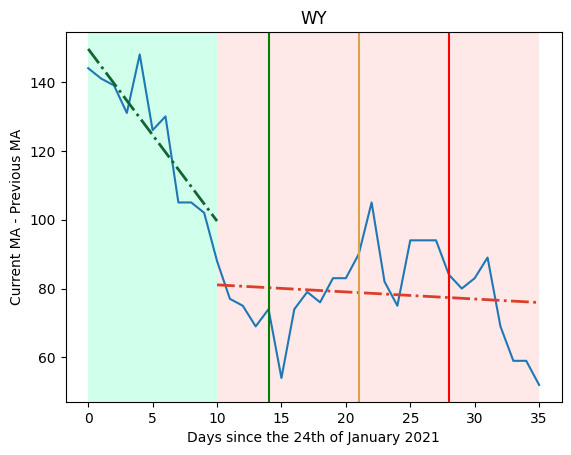

Media: 15.313725490196079
Count: 51.0
Difference: 14
Minimum: (5, 'NJ')
Maximum: (32, 'AK')


In [18]:
#Change point detection with Bayesian Offline

BayesOffline = c.BayesOffline()
media_changepoint = 0.0
count_changepoint = 0.0
min_changepoint = (999,"error")
max_changepoint = (-1,"error")
save_me = []
tabella = pd.DataFrame(columns=['State','FirstSlope','SecondSlope','when'])
for df in dataframe_list:
    df = df.astype(int)
    values = df[df.columns.values[2]].values

    df2 = df[df.columns.values[2]]
    values_before = df2.iloc[:difference.days+1].values
    values_oneWeek = df2.iloc[difference.days+1:difference.days+8].values
    values_twoWeek = df2.iloc[difference.days+8:difference.days+15].values
    values_after = df2.iloc[difference.days+15:].values

    # Out is a list of possible changepoint "indices"
    prob = 0.9
    out = []
    
    plot_out = []
    while len(out) == 0:
        prob = prob * 0.9
        out = BayesOffline.find_changepoints(values, prob_threshold=prob)
    print(out)
    for i in out:
        media_changepoint += i
        count_changepoint += 1
        #find minimum and maximum of the changepoints with their state
        if i < min_changepoint[0]:
            min_changepoint = (i,df.columns.values[0])
        if i > max_changepoint[0]:
            max_changepoint = (i,df.columns.values[0])
        save_me.append((i,df.columns.values[0]))
        

        
    if len(out) == 1:
        i = out[0]
        zed = np.polyfit(range(0,i), values[:i], 1)
        p = np.poly1d(zed)
        zed2 = np.polyfit(range(i,len(values)), values[i:], 1)
        p2 = np.poly1d(zed2)
        plot_out = [[p,np.arange(0,i+1),range(0,i+1),"#116530"],[p2,np.arange(i,len(values)),range(i,len(values)),"#DB3F29"]]
        entry = pd.DataFrame.from_dict({"State": [df.columns.values[0]],'FirstSlope': [zed[0]],'SecondSlope': [zed2[0]],'when': [out[0]]})
    else:
        #plot three trends from two changepoints
        i = out[0]
        j = out[1]
        zed = np.polyfit(range(0,i), values[:i], 1)
        p = np.poly1d(zed)
        zed2 = np.polyfit(range(i,j), values[i:j], 1)
        p2 = np.poly1d(zed2)
        zed3 = np.polyfit(range(j,len(values)), values[j:], 1)
        p3 = np.poly1d(zed3)
        plot_out = [[p,np.arange(0,i+1),range(0,i+1),"#116530"],[p2,np.arange(i,j+1),range(i,j+1),"#D7A449"],[p3,np.arange(j,len(values)),range(j,len(values)),"#DB3F29"]]
        entry = pd.DataFrame.from_dict({"State": [df.columns.values[0]],'FirstSlope': [round_half_up(zed[0])],'SecondSlope': [round_half_up(zed2[0])],'ThirdSlope': [zed3[0]]})
    # Plot the data.
    c.plot_changepoints(values, out, segment_alpha=0.3,segment_colors=['#66ffc2', '#ffb3b3'])

    lw = 2
    tabella = pd.concat([tabella, entry], ignore_index=True)
    for p in plot_out:
        print(p[0]," ", p[1], " ", p[2], " ", p[3])
        plt.plot(p[1], p[0](p[2]), color=p[3], linewidth=lw, linestyle="dashdot")
    

    #plt.plot(values)
    plt.title(df.columns.values[0] )
    plt.axvline(x = difference.days, color = 'green', label = 'Super Bowl')
    plt.axvline(x = difference.days+7, color="#D7A449", label = 'Super Bowl')
    plt.axvline(x = difference.days+14, color = 'red', label = 'Super Bowl')
    plt.xlabel("Days since the 24th of January 2021")
    plt.ylabel("Current MA - Previous MA")
    #save the plot as a png file
    plt.savefig("./pictures/"+df.columns.values[0] + "_changepoint" +".png")
    plt.show()
print("Media: " + str(media_changepoint/count_changepoint))
print("Count: " + str(count_changepoint))
print("Difference: " + str(difference.days))
print("Minimum: " + str(min_changepoint))
print("Maximum: " + str(max_changepoint))

with open('a.txt', 'w') as file:
    for a in save_me:
        file.write(str(a[0]) + "," + str(a[1]) +"\n")

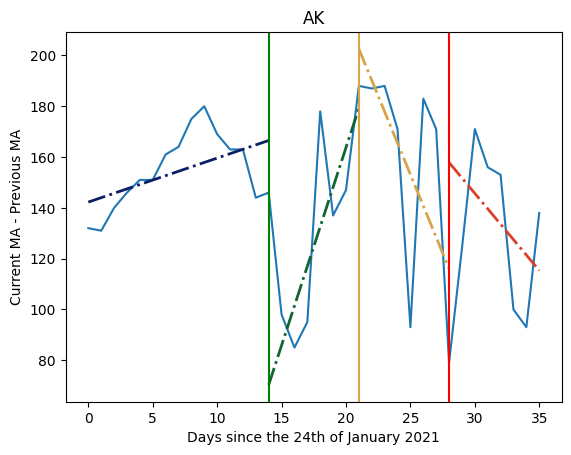

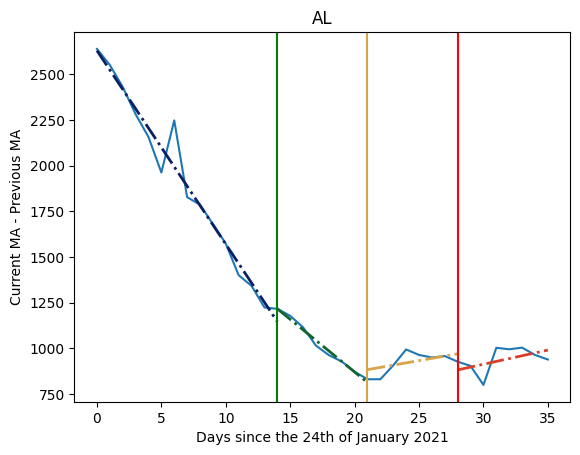

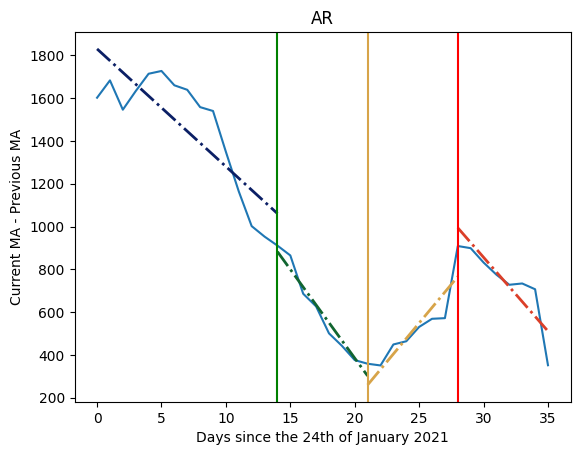

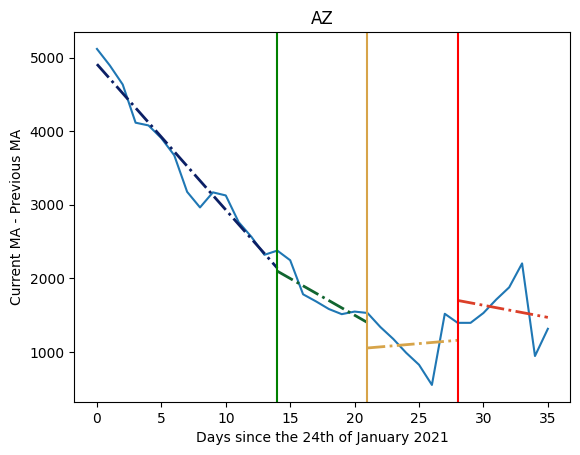

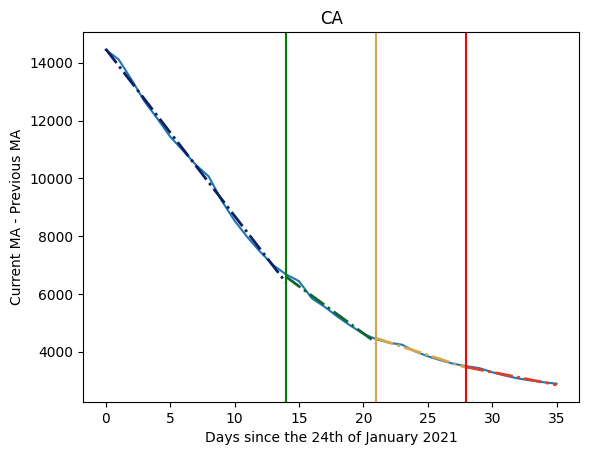

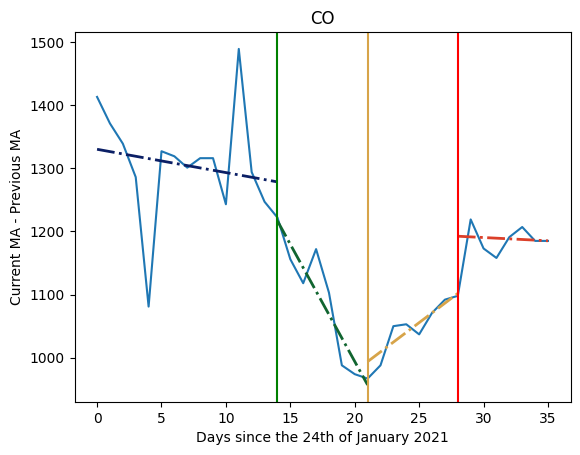

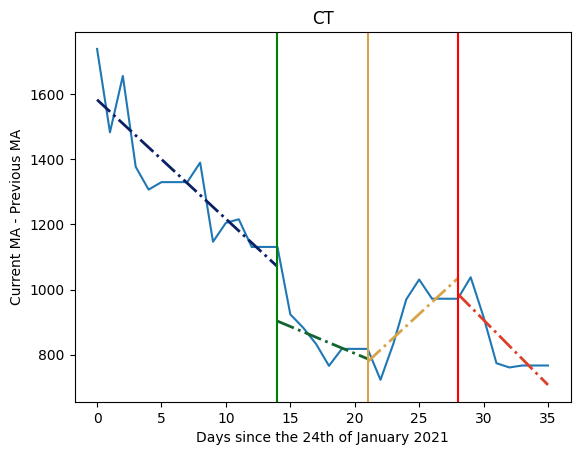

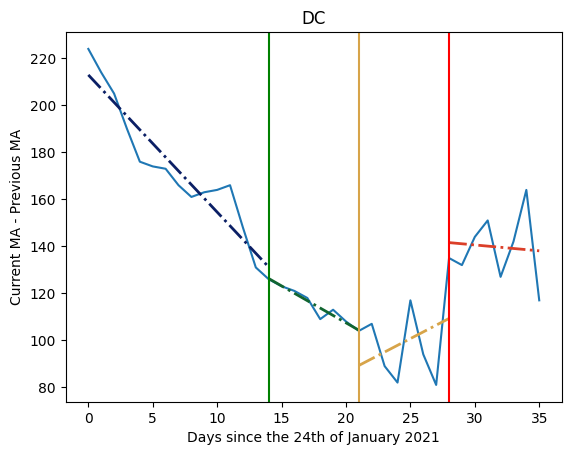

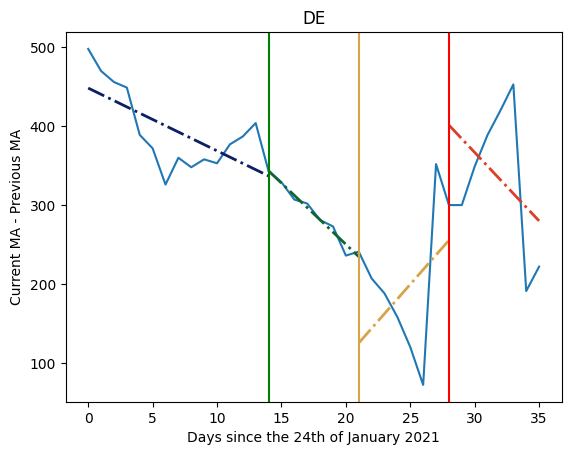

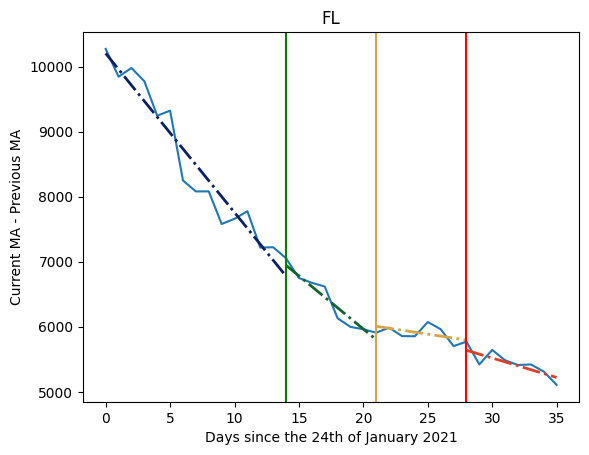

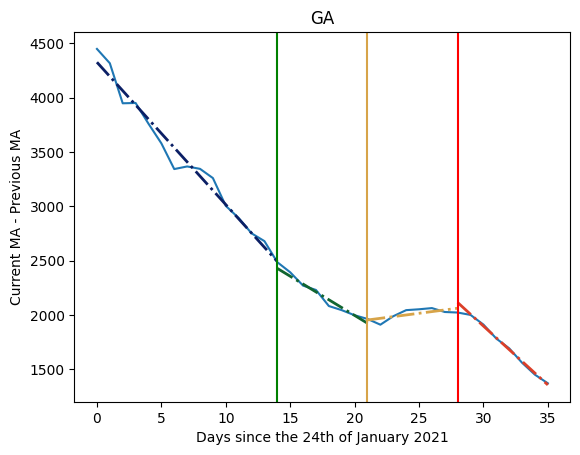

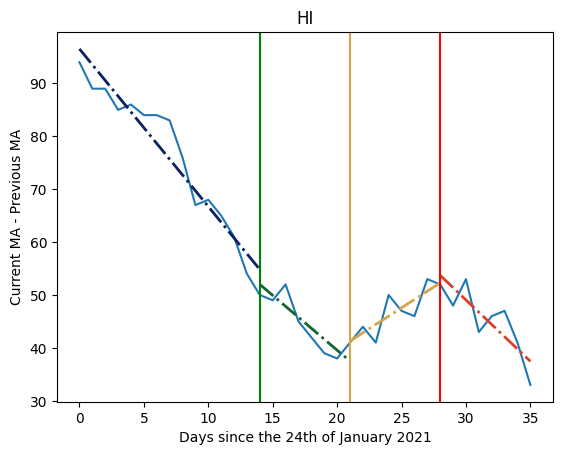

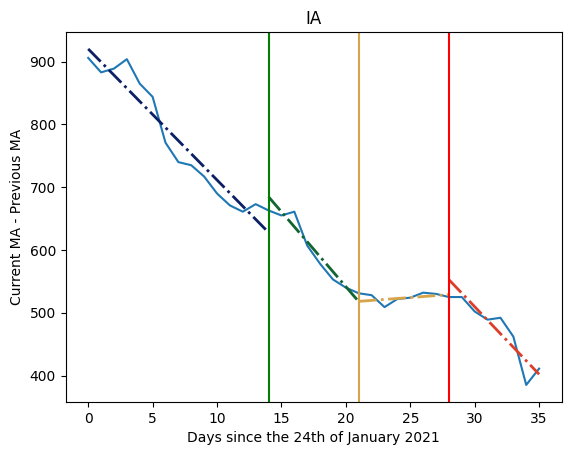

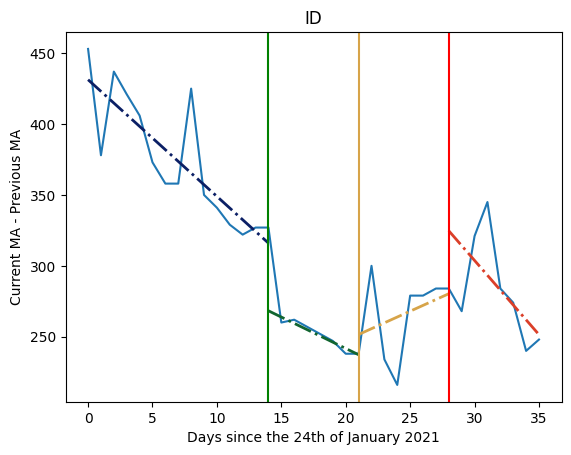

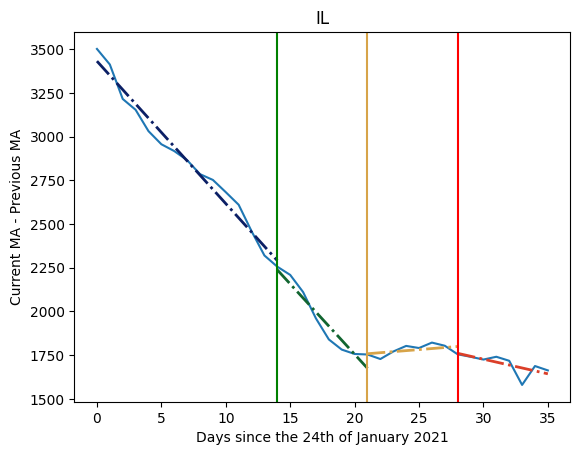

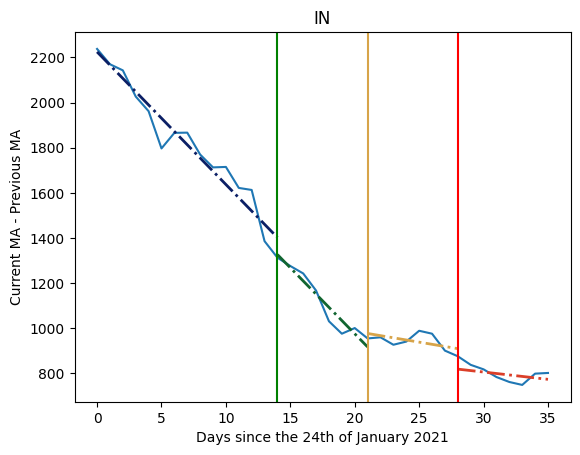

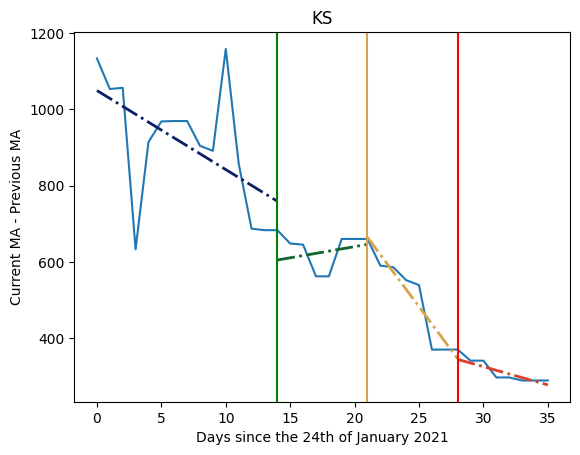

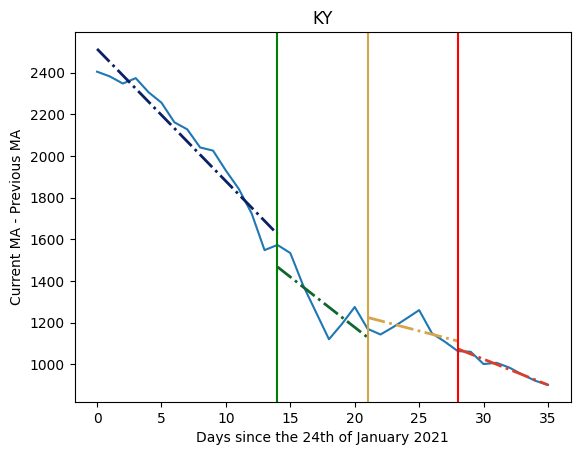

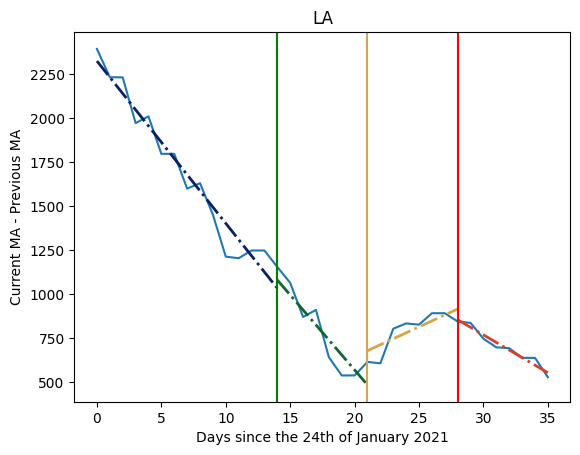

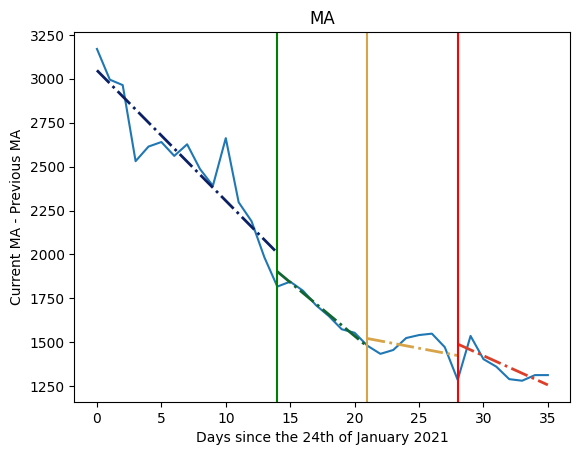

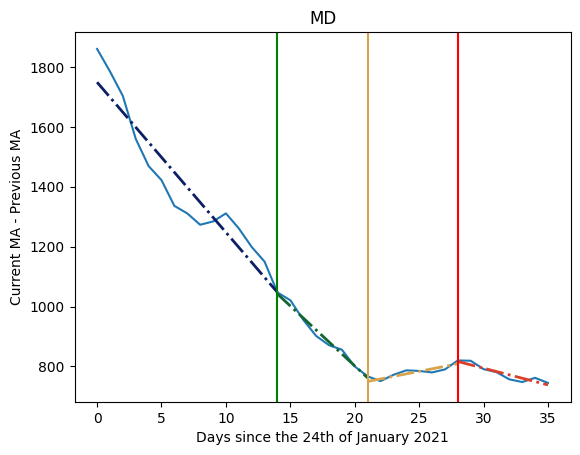

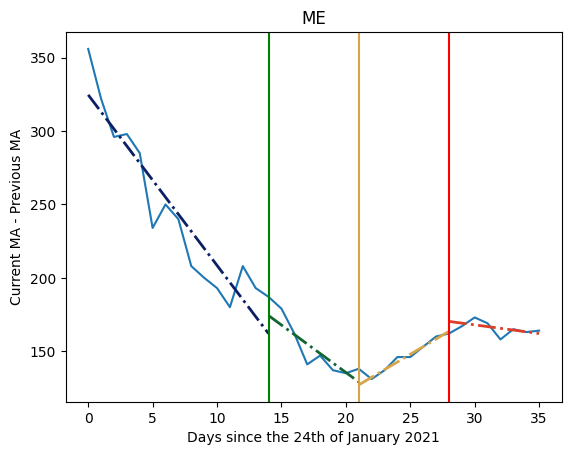

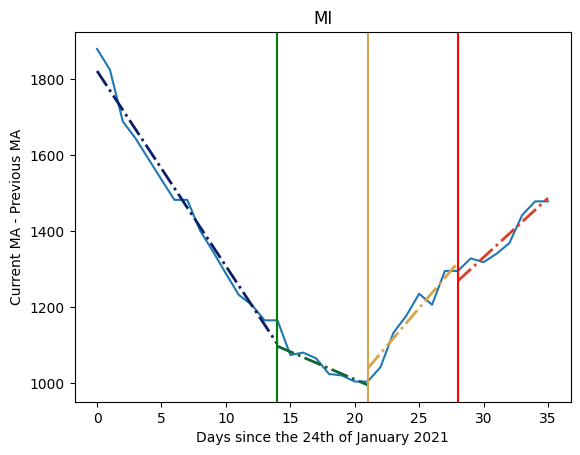

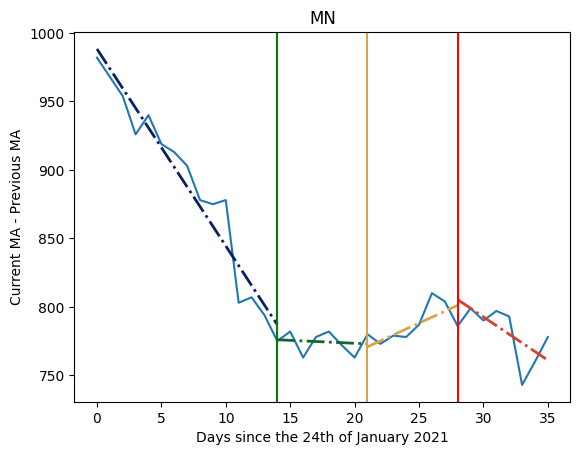

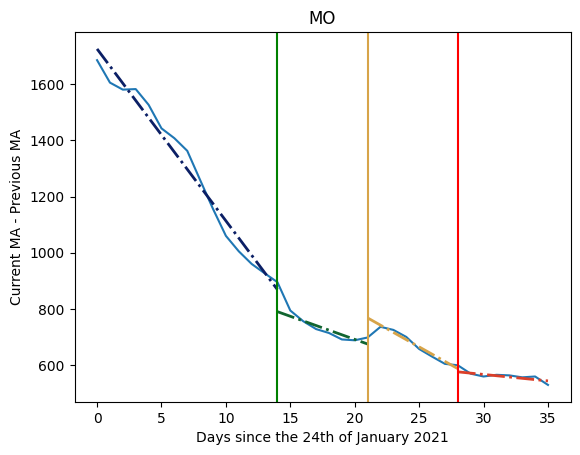

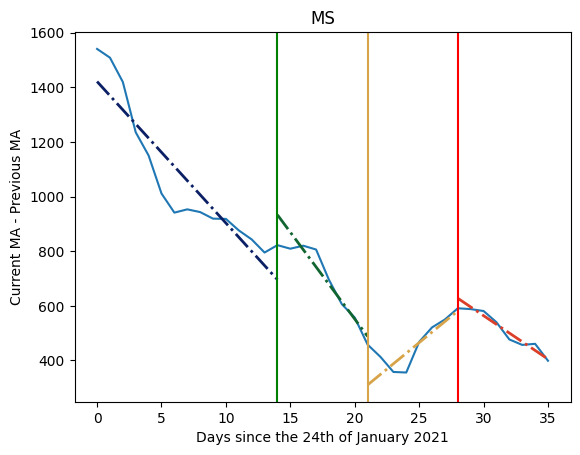

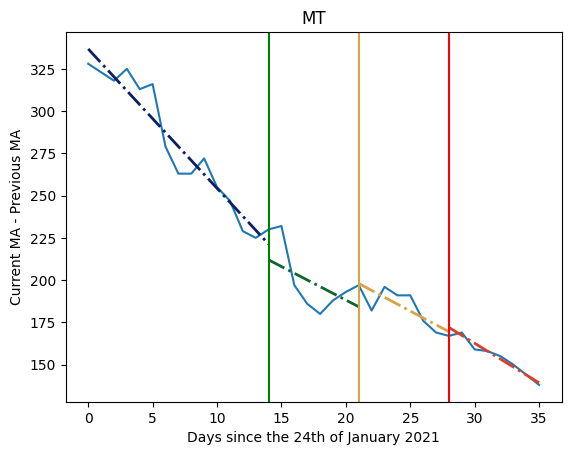

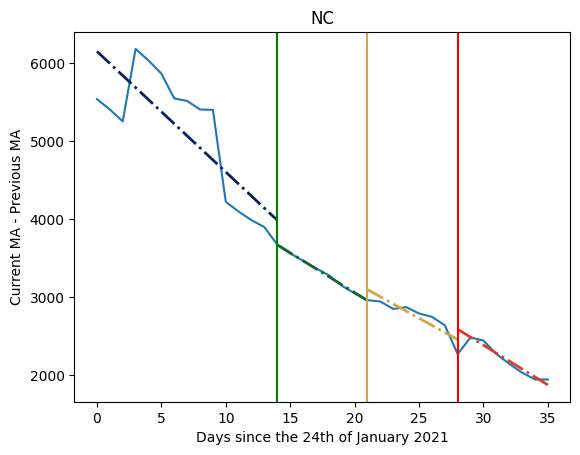

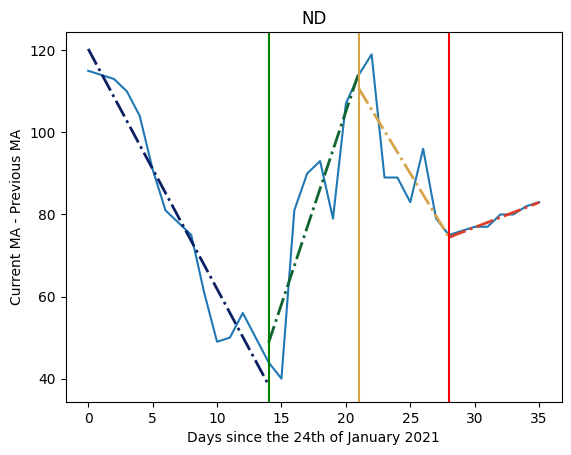

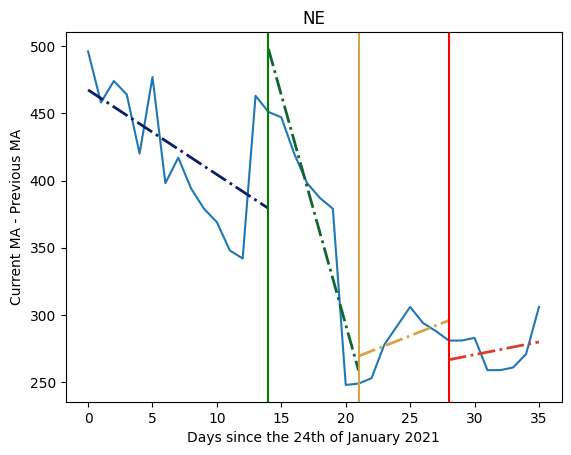

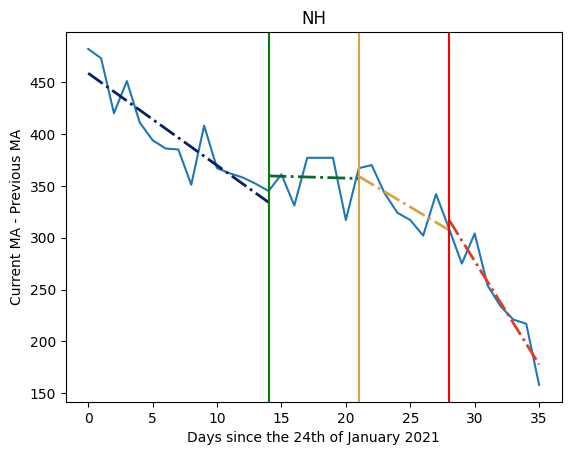

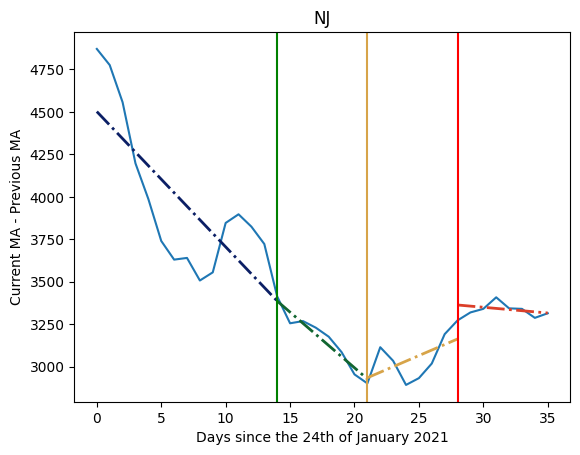

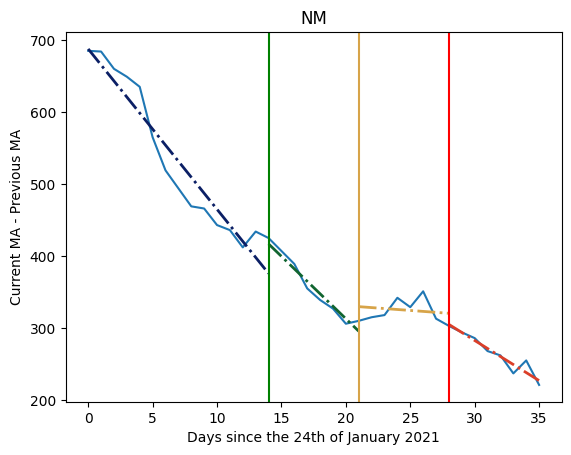

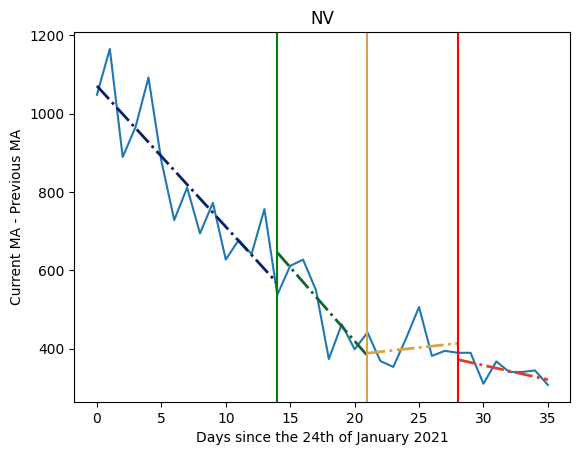

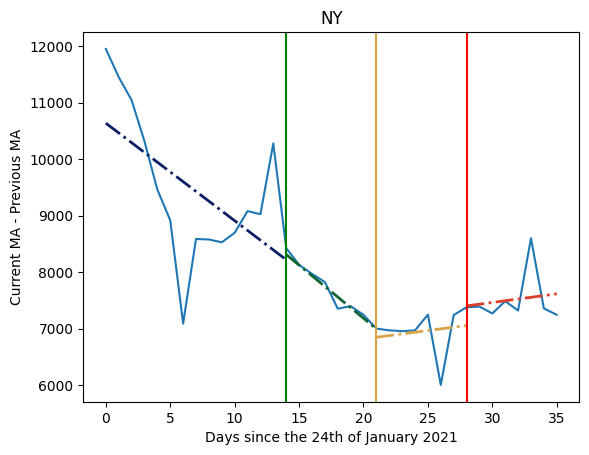

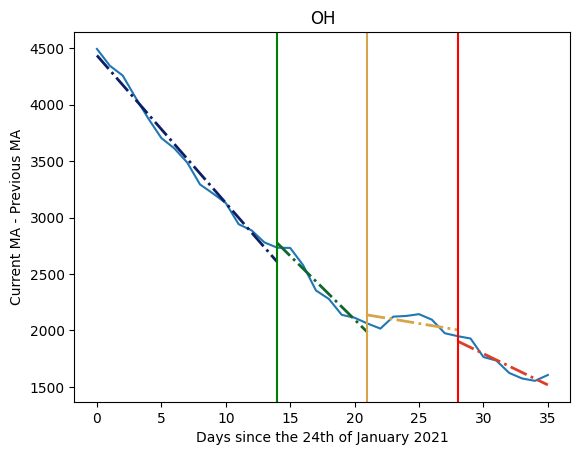

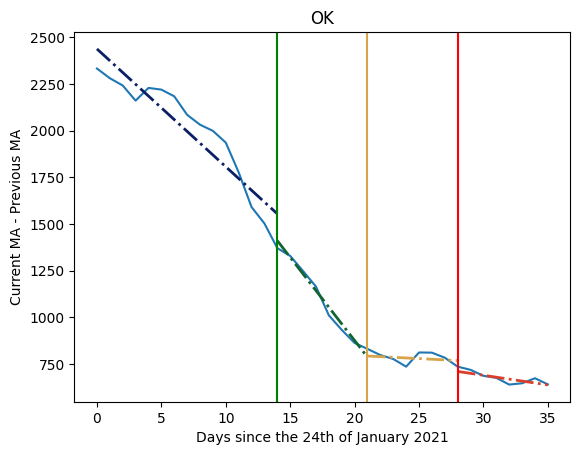

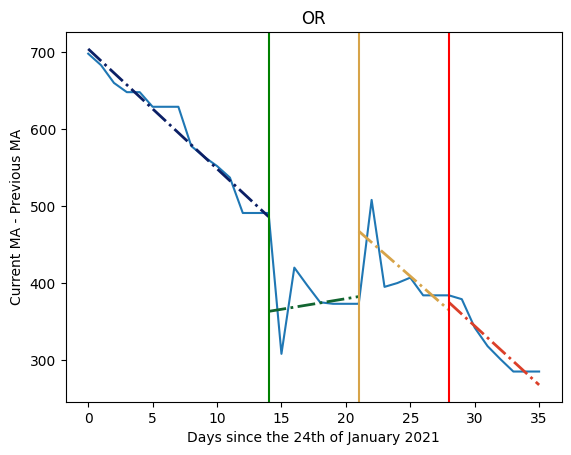

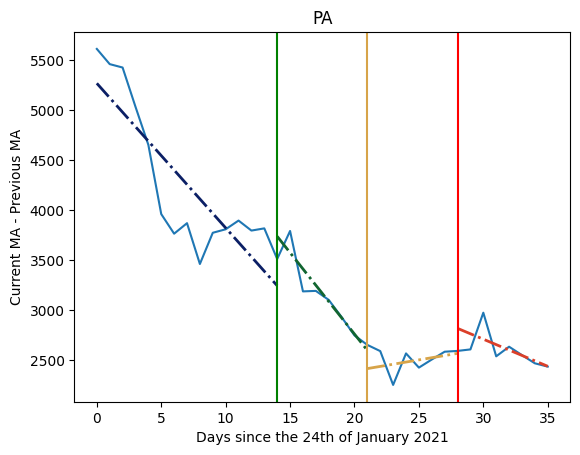

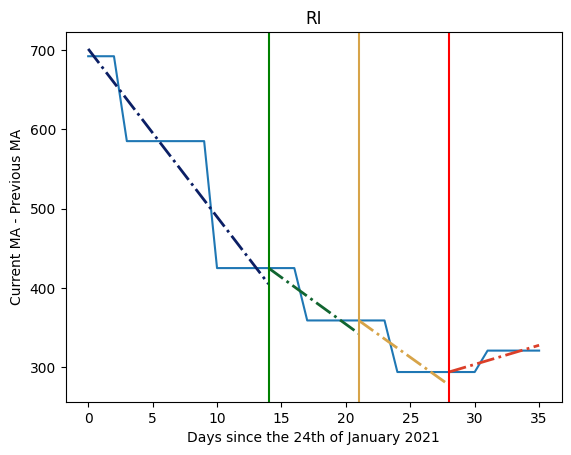

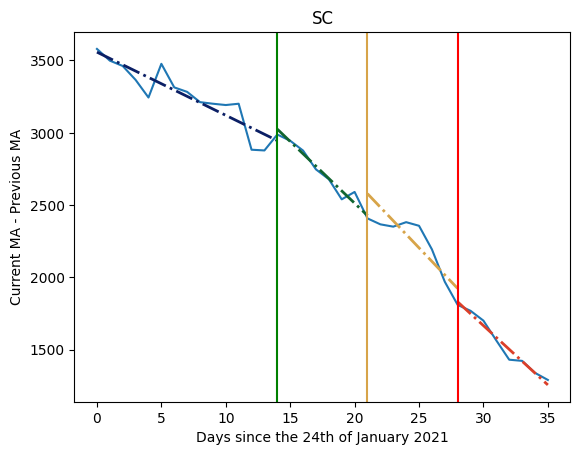

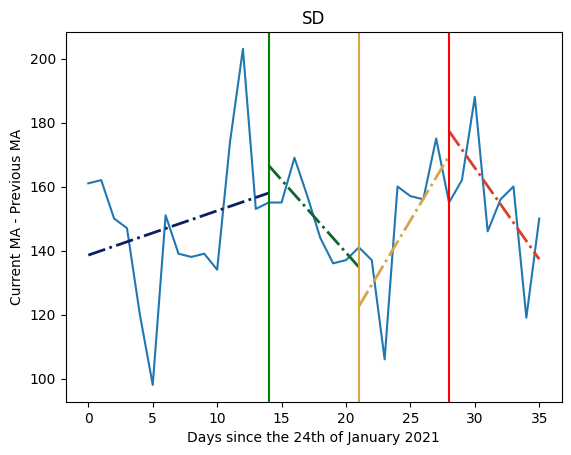

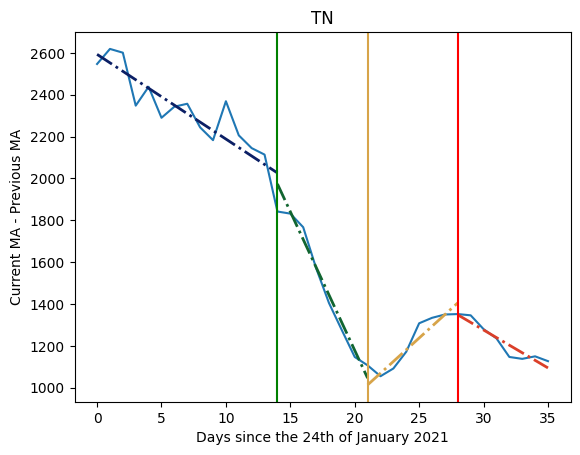

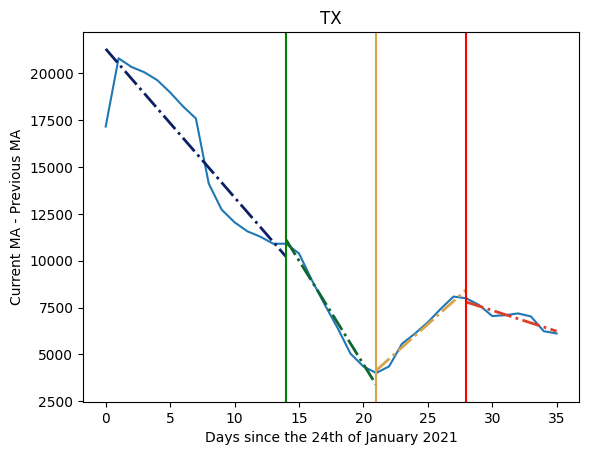

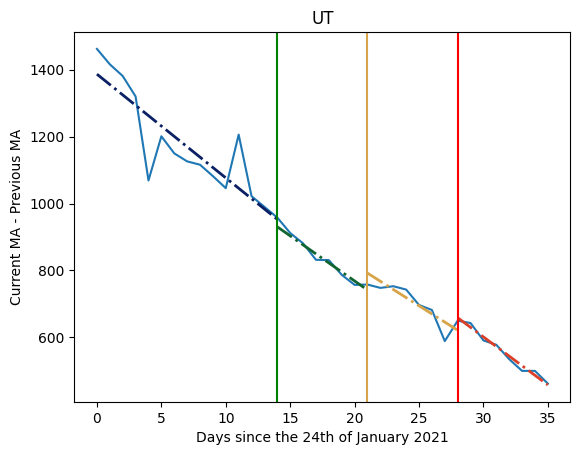

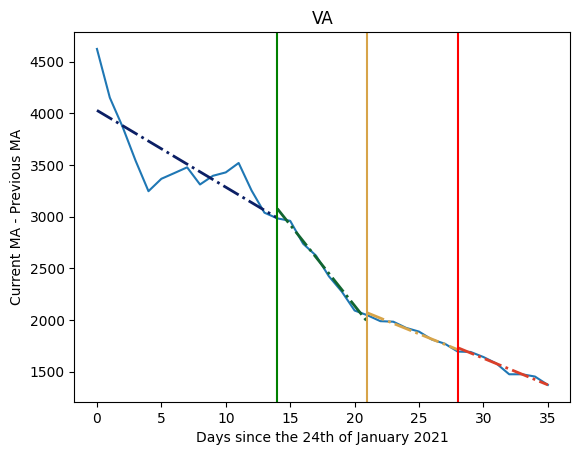

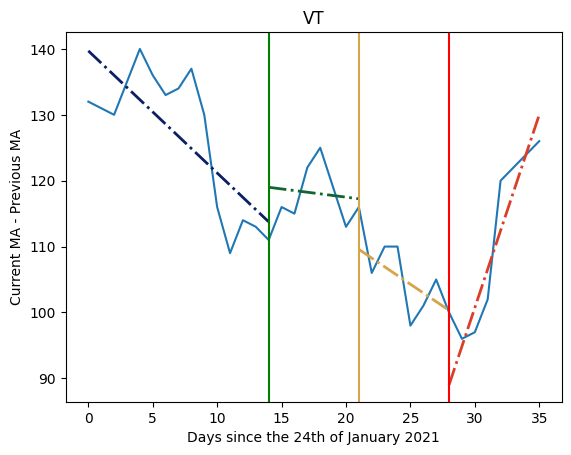

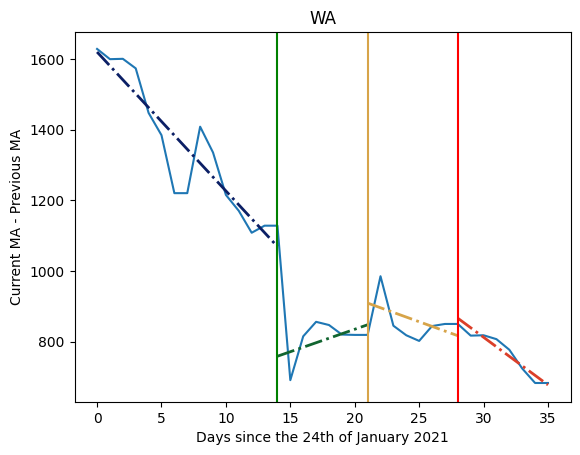

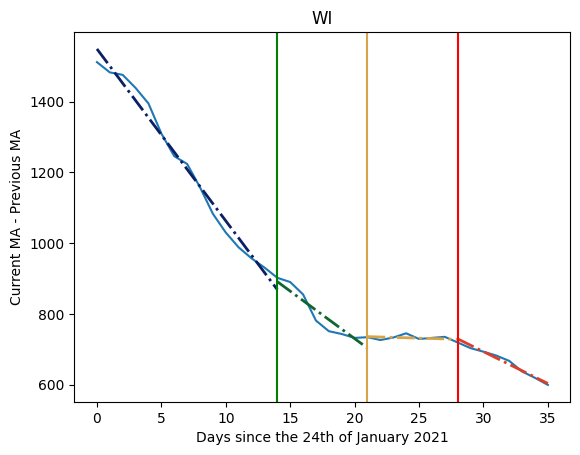

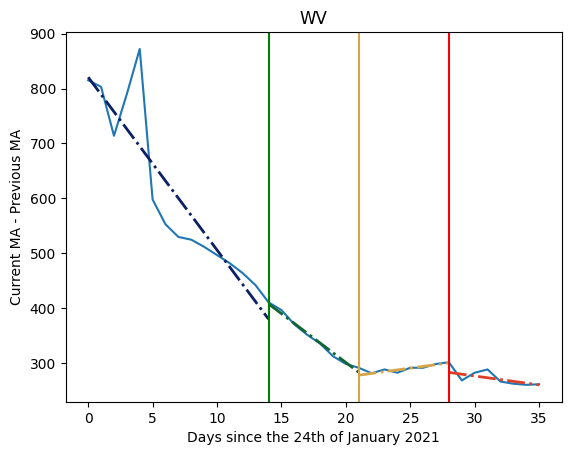

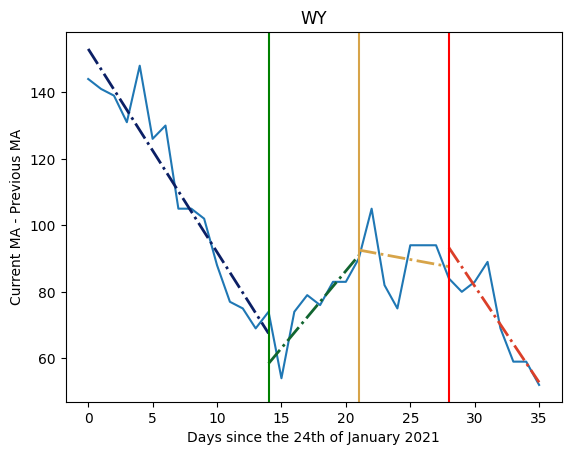

In [19]:
#interval technique
BayesOffline = c.BayesOffline()
media_changepoint = 0.0
count_changepoint = 0.0
min_changepoint = (999,"error")
max_changepoint = (-1,"error")
save_me = []
tabella2 = pd.DataFrame(columns=['State','FirstSlope','SecondSlope','ThirdSlope','FourthSlope'])
for df in dataframe_list:
    df = df.astype(int)
    values = df[df.columns.values[2]].values

    df2 = df[df.columns.values[2]]
    values_before = df2.iloc[:difference.days+1].values
    values_oneWeek = df2.iloc[difference.days+1:difference.days+8].values
    values_twoWeek = df2.iloc[difference.days+8:difference.days+15].values
    values_after = df2.iloc[difference.days+15:].values

    # Out is a list of possible changepoint "indices"
    prob = 0.9
    out = []
    
    plot_out = []
    while len(out) == 0:
        prob = prob * 0.9
        out = BayesOffline.find_changepoints(values, prob_threshold=prob)
        

    # Plot the data.
    c.plot_changepoints(values, out, segment_alpha=0,segment_colors=['#66ffc2', '#ffb3b3']) #here it's used just to plot the initial graph, easier than doing it manually



    z1 = np.polyfit(range(0,len(values_before)), values_before, 1)
    #print ("{0}x + {1}".format(*z1))
    p1 = np.poly1d(z1)
    z2 = np.polyfit(range(len(values_before),len(values_before)+len(values_oneWeek)), values_oneWeek, 1)
    p2 = np.poly1d(z2)
    z3 = np.polyfit(range(len(values_before)+len(values_oneWeek),len(values_before)+len(values_oneWeek)+len(values_twoWeek)), values_twoWeek, 1)
    p3 = np.poly1d(z3)
    z4 = np.polyfit(range(len(values_before)+len(values_oneWeek)+len(values_twoWeek),len(values_before)+len(values_oneWeek)+len(values_twoWeek)+len(values_after)), values_after, 1)
    p4 = np.poly1d(z4)
    
    entry = pd.DataFrame.from_dict({"State": [df.columns.values[0]],'FirstSlope': [z1[0]],'SecondSlope': [z2[0]],'ThirdSlope': [z3[0]],'FourthSlope': [z4[0]]})
    tabella2 = pd.concat([tabella2, entry], ignore_index=True)

    array1 = np.arange(0,len(values_before))
    array2 = np.arange(len(values_before),len(values_before)+len(values_oneWeek))
    array2 = np.insert(array2, 0, array1[-1])
    array3 = np.arange(len(values_before)+len(values_oneWeek),len(values_before)+len(values_oneWeek)+len(values_twoWeek))
    array3 = np.insert(array3, 0, array2[-1])
    array4 = np.arange(len(values_before)+len(values_oneWeek)+len(values_twoWeek),len(values_before)+len(values_oneWeek)+len(values_twoWeek)+len(values_after))
    array4 = np.insert(array4, 0, array3[-1])
    lw = 2
    

    plt.plot(array1, p1(range(0,len(values_before))), color="#0B1F65", linewidth=lw, linestyle="dashdot")
    plt.plot(array2, p2(range(len(values_before)-1,len(values_before)+len(values_oneWeek))), color="#116530", linewidth=lw, linestyle="dashdot")
    plt.plot(array3, p3(range(len(values_before)+len(values_oneWeek)-1,len(values_before)+len(values_oneWeek)+len(values_twoWeek))), color="#D7A449", linewidth=lw, linestyle="dashdot")
    plt.plot(array4, p4(range(len(values_before)+len(values_oneWeek)+len(values_twoWeek)-1,len(values_before)+len(values_oneWeek)+len(values_twoWeek)+len(values_after))), color="#DB3F29", linewidth=lw, linestyle="dashdot")

    

    #plt.plot(values)
    plt.title(df.columns.values[0] )
    plt.axvline(x = difference.days, color = 'green', label = 'Super Bowl')
    plt.axvline(x = difference.days+7, color="#D7A449", label = 'Super Bowl')
    plt.axvline(x = difference.days+14, color = 'red', label = 'Super Bowl')
    plt.xlabel("Days since the 24th of January 2021")
    plt.ylabel("Current MA - Previous MA")
    #save the plot as a png file
    plt.savefig("./pictures/"+df.columns.values[0] + "_intervals" +".png")
    plt.show()

In [20]:
#tabella is the table for changepoints and tabella2 is the table for the intervals
tabella.set_index(tabella['State'])
tabella.to_csv("./tabella.csv", index=False)

tabella2.set_index(tabella2['State'])
tabella2.to_csv("./tabella2.csv", index=False)